In [1]:
import numpy as np 
import pandas as pd

In [2]:
train = pd.read_csv('data/training.csv.gz')

In [3]:
print(train)

      left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0             66.033564          39.002274           30.227008   
1             64.332936          34.970077           29.949277   
2             65.057053          34.909642           30.903789   
3             65.225739          37.261774           32.023096   
4             66.725301          39.621261           32.244810   
5             69.680748          39.968748           29.183551   
6             64.131866          34.290040           29.578953   
7             67.468893          39.413452           29.355961   
8             65.802880          34.755200           27.475840   
9             64.121231          36.740308           29.468923   
10            65.230189          34.342642           28.802717   
11            66.737600          39.886400           30.270400   
12            66.574737          37.308000           30.445263   
13            65.270588          34.940235           33.022745   
14        

In [4]:
list(train.columns.values)

['left_eye_center_x',
 'left_eye_center_y',
 'right_eye_center_x',
 'right_eye_center_y',
 'left_eye_inner_corner_x',
 'left_eye_inner_corner_y',
 'left_eye_outer_corner_x',
 'left_eye_outer_corner_y',
 'right_eye_inner_corner_x',
 'right_eye_inner_corner_y',
 'right_eye_outer_corner_x',
 'right_eye_outer_corner_y',
 'left_eyebrow_inner_end_x',
 'left_eyebrow_inner_end_y',
 'left_eyebrow_outer_end_x',
 'left_eyebrow_outer_end_y',
 'right_eyebrow_inner_end_x',
 'right_eyebrow_inner_end_y',
 'right_eyebrow_outer_end_x',
 'right_eyebrow_outer_end_y',
 'nose_tip_x',
 'nose_tip_y',
 'mouth_left_corner_x',
 'mouth_left_corner_y',
 'mouth_right_corner_x',
 'mouth_right_corner_y',
 'mouth_center_top_lip_x',
 'mouth_center_top_lip_y',
 'mouth_center_bottom_lip_x',
 'mouth_center_bottom_lip_y',
 'Image']

In [5]:
import matplotlib.pyplot as plt

def gimg(n):
    img = np.array(list(float(x) for x in train['Image'].values[n].split(" ")), dtype=float)
    return np.reshape(
        # greyscale images using the same value for R G B
        np.column_stack(
            (img, img, img)
        ),
        (96, 96, 3)
    )

In [6]:
img = gimg(3)

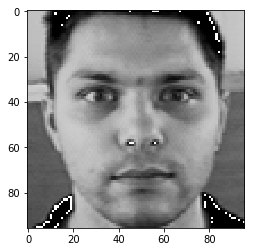

In [7]:
plt.imshow(1 - img)
plt.show()

In [8]:
X = np.array(train['Image'].str.split(' ', 9216, expand=True), dtype=float)
y = np.array(train['left_eye_center_x'], dtype=float)

In [9]:
# normalize
X = X / 255
# select 75% for training, we will use the other 25% to test
train_size = int(X.shape[0] * .75)

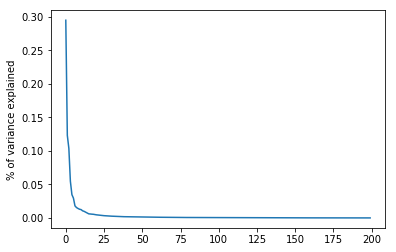

In [10]:
from sklearn.decomposition import PCA

## PCA decomposition
pca = PCA(n_components=200) #Finds first 200 PCs
pca.fit(X)
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('% of variance explained')
plt.show()
